 
  # VENTA  DE  CASAS  EN  EL  CONDADO  KING,  EE.UU

## Predicción del precio en base a modelos de Machine Learning

### 1. Carga de librerias y base de datos:

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [496]:
file_name=r"C:\Users\User\Downloads\venta_de_casas.csv"
df=pd.read_csv(file_name)

In [410]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 2. Exploración 

In [353]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

id : Anotación para la casa

date: Fecha de venta de la casa

price: El precio es el objetivo a predecir

bedrooms: Número de habitaciones

bathrooms: Número de baños

sqft_living: Pies cuadrados de superficie de la casa

sqft_lot: Pies cuadrados de superficie de la propiedad

floors :Número de pisos (niveles) de la casa

waterfront :Casa con vista al mar

view: Casa ya vista

condition :Que tan buenas son en general las condiciones

grade: puntuación general dada a la unidad habitacional en base al sistema de puntuación del condado King

sqft_above : Pies cuadrados de superficie de la casa sin contar el sótano

sqft_basement: Pies cuadrados de superficie del sótano

yr_built : Año de construcción

yr_renovated : Año de restauración de la casa

zipcode: Código Postal

lat: Latitud (coordenada)

long: Longitud (coordenada)

sqft_living15 : Superficie de la sala en 2015 (implica algunas reformas) Esto pudo haber modificado o no el área de la propiedad

sqft_lot15 : Area de la propiedad en 2015 (implica algunas reformas)

In [411]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["id"], axis=1, inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Análisis de valores nulos:

In [355]:
df.isnull().sum()

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [356]:
df.shape

(21613, 19)

In [7]:
#Bedrooms y bathrooms imputarlos tras EDA (Analisis exploratorio de datos)

#### Exploración de la distribución de las variables:

In [358]:
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15','sqft_lot15']

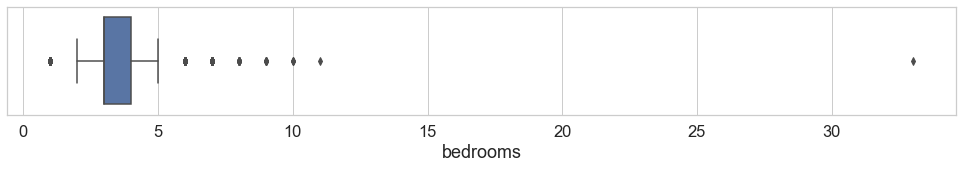

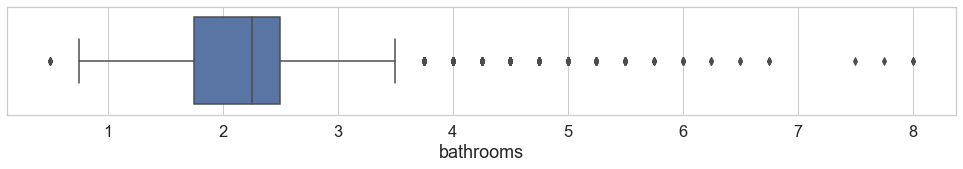

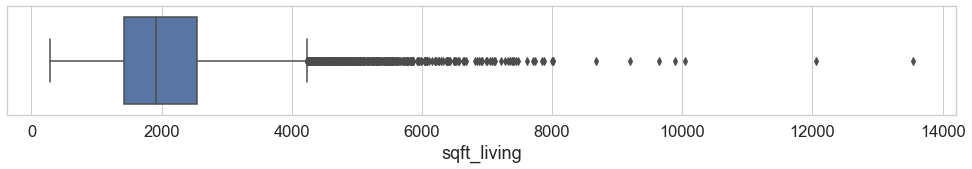

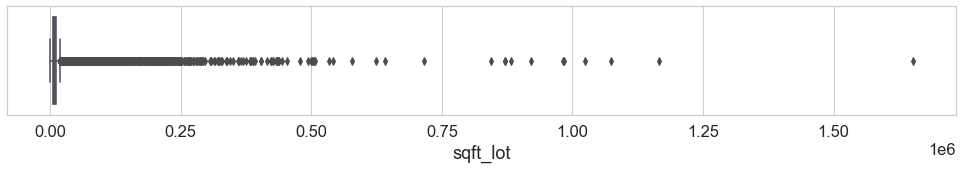

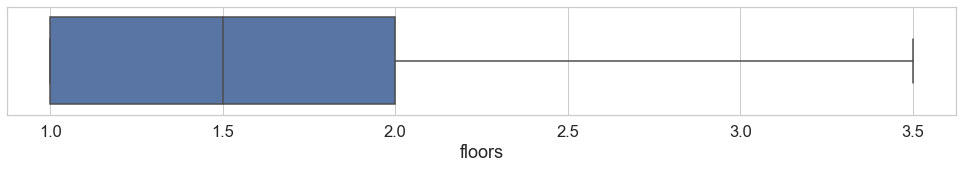

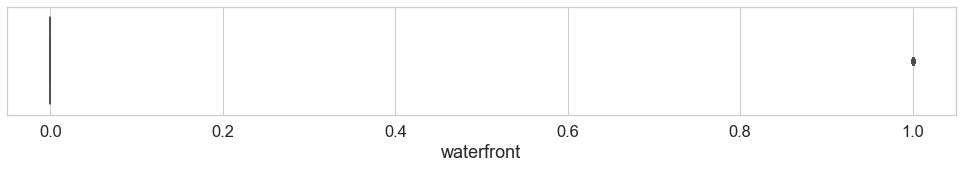

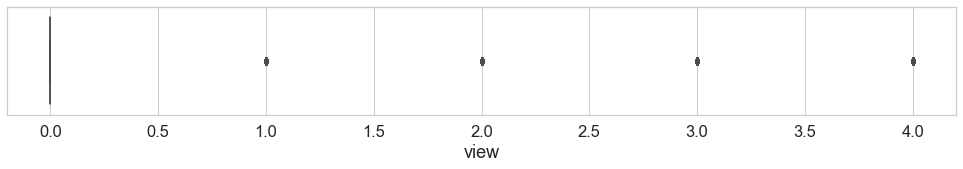

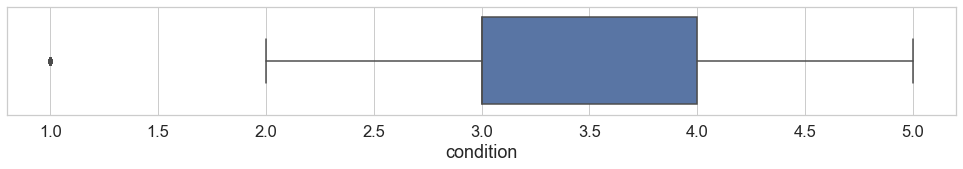

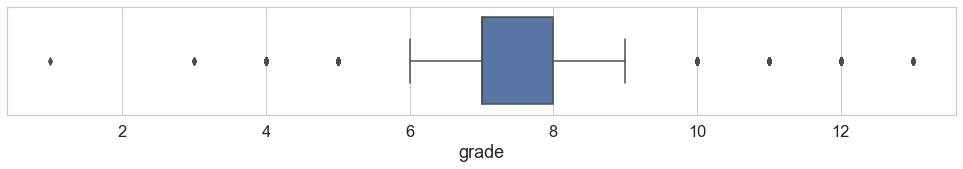

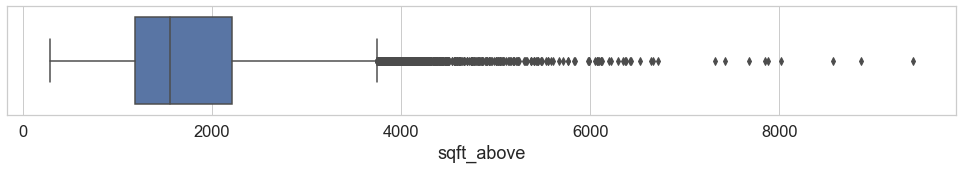

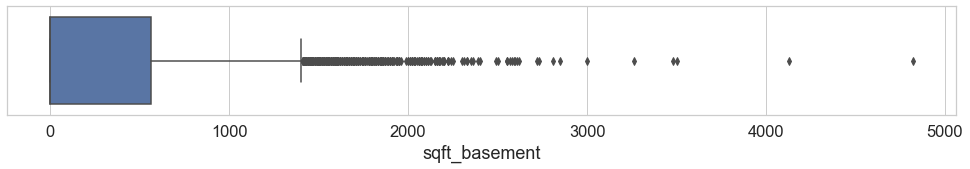

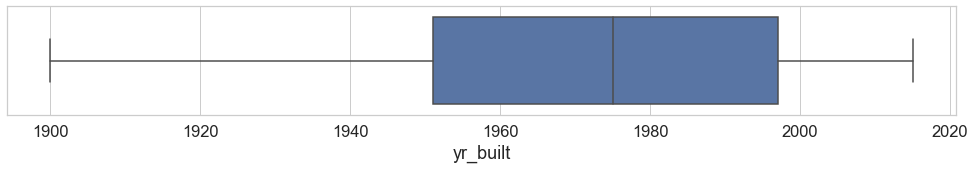

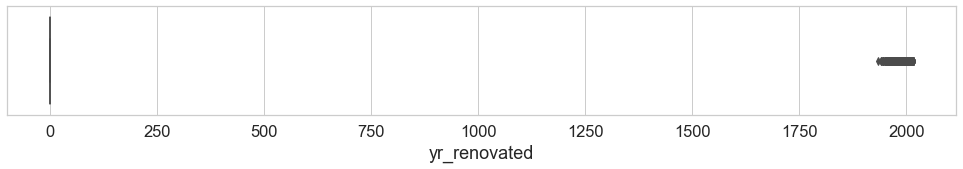

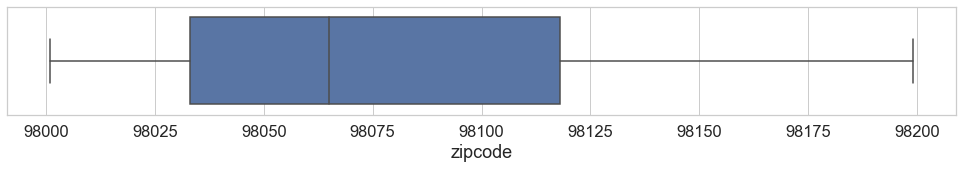

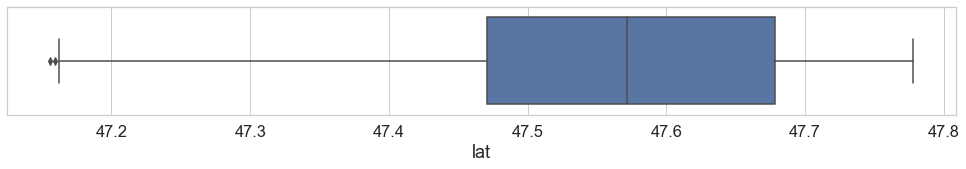

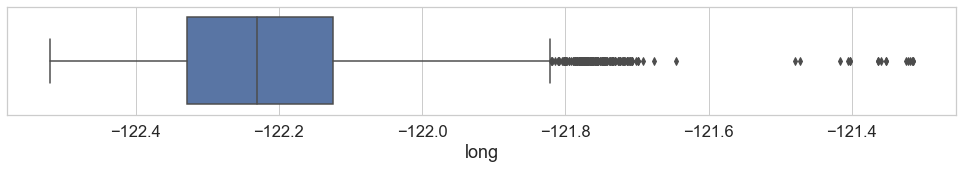

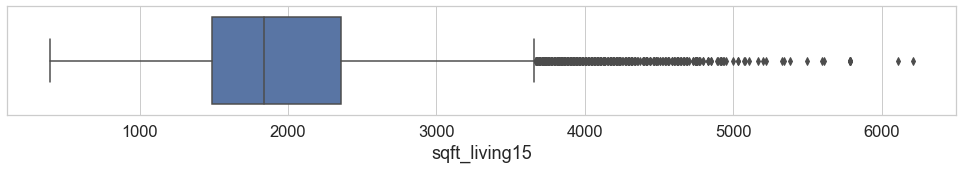

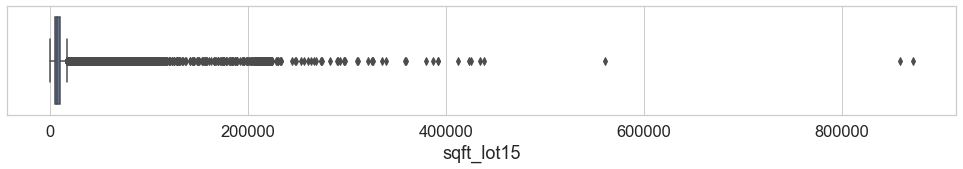

In [359]:
sns.set(rc={'figure.figsize':(17,2)}, font_scale=1.5, style='whitegrid')
for item in cols:     
    sns.boxplot(x = df[item], )
    plt.show()

### 3. Tratamiento de datos:
#### Imputación de valores nulos

In [360]:
print("Número de valores nulos en la variable bedrooms :", df['bedrooms'].isnull().sum())
print("Número de valores nulos en la variable bathrooms :", df['bathrooms'].isnull().sum())

Número de valores nulos en la variable bedrooms : 13
Número de valores nulos en la variable bathrooms : 10


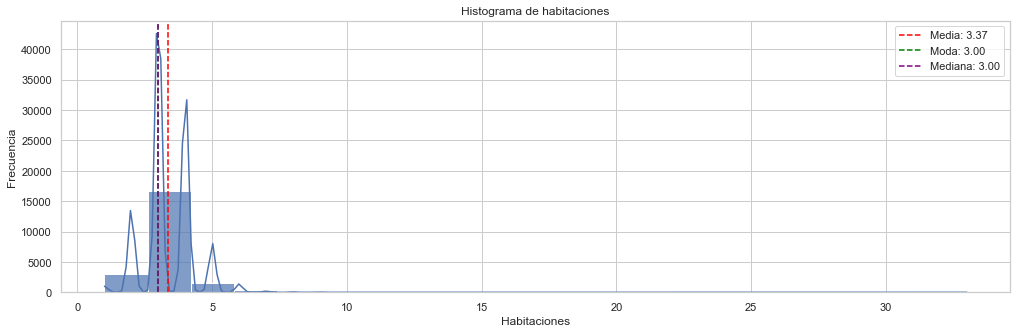

In [362]:
#Bedrooms:
media=df['bedrooms'].mean()
moda=df['bedrooms'].mode().values[0]
mediana=df['bedrooms'].median()
sns.set(style='whitegrid')
plt.figure(figsize=(17,5))
ax= sns.histplot(data=df, x='bedrooms',kde=True, bins=20, alpha=0.7)
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(moda, color='green', linestyle='--', label=f'Moda: {moda:.2f}')
plt.axvline(mediana, color='purple', linestyle='--', label=f'Mediana: {mediana:.2f}')

plt.legend(loc='upper right')
plt.title('Histograma de habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Frecuencia')

plt.show()

In [340]:
bedrooms_counts= df["bedrooms"].value_counts()
bedrooms_counts

3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

In [412]:
#Tras el análisis se reemplazan los valores faltantes por la moda. 
df['bedrooms'].replace(np.nan,moda, inplace=True)
print("Número de valores nulos en la variable bedrooms :", df['bedrooms'].isnull().sum())

Número de valores nulos en la variable bedrooms : 0


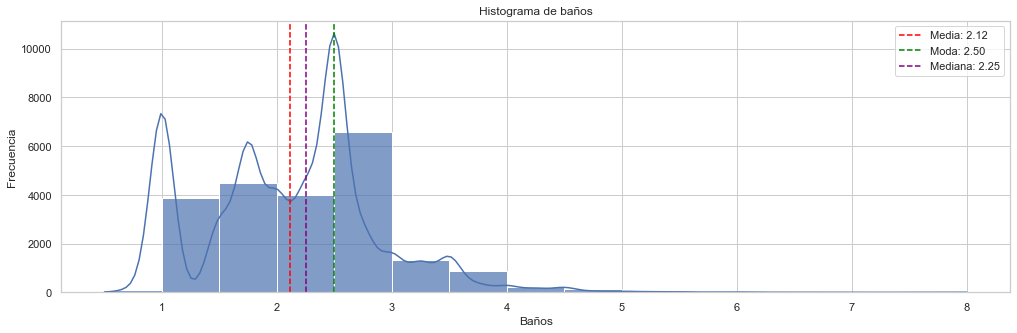

In [365]:
#Bathrooms:
media=df['bathrooms'].mean()
moda=df['bathrooms'].mode().values[0]
mediana=df['bathrooms'].median()
sns.set(style='whitegrid')
plt.figure(figsize=(17,5))
ax= sns.histplot(data=df, x='bathrooms',kde=True, bins=15, alpha=0.7)
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(moda, color='green', linestyle='--', label=f'Moda: {moda:.2f}')
plt.axvline(mediana, color='purple', linestyle='--', label=f'Mediana: {mediana:.2f}')

plt.legend(loc='upper right')
plt.title('Histograma de baños')
plt.xlabel('Baños')
plt.ylabel('Frecuencia')

plt.show()

In [396]:
bathrooms_counts= df["bathrooms"].value_counts().sort_values(ascending=False)
bathrooms_counts

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [413]:
#Tras el análisis se reemplazan los valores faltantes por la moda.
df['bathrooms'].replace(np.nan,moda, inplace=True)
print("Número de valores nulos en la variable bathrooms :", df['bathrooms'].isnull().sum())

Número de valores nulos en la variable bathrooms : 0


#### Tratamiento de outliers:

In [414]:
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 2.5 * IQR)) |(df[cols] > (Q3 + 2.5 * IQR))).any(axis=1)]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [415]:
df1= df

#### Análisis de correlaciones para evaluar datos redundantes:

##### Test de normalidad:

In [417]:
from scipy.stats import shapiro
estadistico, p_value= shapiro(df)
print('Estadistico=%.3f, p_value=%.3f' % (estadistico, p_value))

Estadistico=0.286, p_value=0.000


In [418]:
#Tabla de correlaciones:
Corr=pd.DataFrame(df).corr(method='spearman')
Corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.298362,0.417113,0.559089,-0.077910,0.300797,NaN,NaN,0.027152,0.584620,0.454974,0.198268,0.103060,NaN,-0.004458,0.512061,0.065838,0.490329,-0.089979
bedrooms,0.298362,1.000000,0.489326,0.657333,0.214524,0.208758,NaN,NaN,0.021853,0.346855,0.538294,0.191364,0.185449,NaN,-0.192035,-0.054990,0.217775,0.451386,0.200766
bathrooms,0.417113,0.489326,1.000000,0.718665,-0.046565,0.564798,NaN,NaN,-0.184927,0.626339,0.664547,0.128582,0.631528,NaN,-0.238046,-0.028475,0.298390,0.561743,-0.050467
sqft_living,0.559089,0.657333,0.718665,1.000000,0.195787,0.390146,NaN,NaN,-0.066493,0.656975,0.820832,0.280006,0.377822,NaN,-0.237786,-0.000152,0.311460,0.732464,0.175795
sqft_lot,-0.077910,0.214524,-0.046565,0.195787,1.000000,-0.350822,NaN,NaN,0.157622,0.014679,0.155299,0.021612,-0.132727,NaN,-0.292741,-0.118169,0.297106,0.241851,0.908337
floors,0.300797,0.208758,0.564798,0.390146,-0.350822,1.000000,NaN,NaN,-0.314680,0.514038,0.594457,-0.309591,0.604792,NaN,-0.073515,-0.004883,0.158002,0.309753,-0.349508
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.027152,0.021853,-0.184927,-0.066493,0.157622,-0.314680,NaN,NaN,1.000000,-0.191522,-0.166482,0.169993,-0.424896,NaN,-0.027343,-0.004846,-0.082110,-0.112888,0.157909
grade,0.584620,0.346855,0.626339,0.656975,0.014679,0.514038,NaN,NaN,-0.191522,1.000000,0.665620,0.016671,0.549069,NaN,-0.206538,0.084379,0.237398,0.614715,0.021631


In [419]:
import numpy as np
from scipy.linalg import svd
U, s, V_transp=svd(df)
s

array([6.87659114e+07, 5.68776659e+06, 6.44260177e+05, 1.73698318e+05,
       1.07271396e+05, 5.81281780e+04, 4.18129650e+04, 3.19319280e+03,
       8.64154644e+01, 7.54875042e+01, 7.19963693e+01, 5.34469036e+01,
       4.17322672e+01, 1.49223555e+01, 1.25685531e+01, 6.14255369e-11,
       1.61887753e-12, 1.81161998e-15, 1.42465461e-16])

In [420]:
rank=np.sum(s>1)

In [421]:
print ("La matriz tiene rango {}".format(rank))

La matriz tiene rango 15


In [422]:
#De las 19 variables de la base de datos, 5 tienen valores redundantes o nulos: waterfront, view, yr_renovated, sqft_lot15 y sqft_lot

#### Variables a incluir en el modelo:

In [423]:
df.corr('spearman')['price'].sort_values()

sqft_lot15      -0.089979
sqft_lot        -0.077910
zipcode         -0.004458
condition        0.027152
long             0.065838
yr_built         0.103060
sqft_basement    0.198268
bedrooms         0.298362
floors           0.300797
bathrooms        0.417113
sqft_above       0.454974
sqft_living15    0.490329
lat              0.512061
sqft_living      0.559089
grade            0.584620
price            1.000000
waterfront            NaN
view                  NaN
yr_renovated          NaN
Name: price, dtype: float64

In [424]:
# Las 2 variables con valores redundantes, tienen poca correlación con la variable target, por lo tanto se excluyen del modelo.
# Se incluyen en el modelo variables con correlación superior a 0.15

In [425]:
features =["sqft_basement","bedrooms","floors","bathrooms","sqft_above","sqft_living15","lat","sqft_living","grade"]    
X = df[features]
y = df['price']

### 4. Estandarización y evaluación de modelos:

In [426]:
numeric_transformer=Pipeline(steps=[('Scaler', StandardScaler())])

In [427]:
transformer=ColumnTransformer([
    ('num',numeric_transformer,features)
])

In [428]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [429]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14283, 9), (2521, 9), (14283,), (2521,))

#### Modelo de Regesión lineal multiple:

In [430]:
from sklearn.linear_model import LinearRegression
linear_regression= LinearRegression()
model_linear_regression=Pipeline ([
    ('transformer', transformer),
    ('linear_regression',linear_regression)
])

In [431]:
model_linear_regression.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_basement', 'bedrooms',
                                                   'floors', 'bathrooms',
                                                   'sqft_above',
                                                   'sqft_living15', 'lat',
                                                   'sqft_living', 'grade'])])),
                ('linear_regression', LinearRegression())])

In [432]:
muestra_datos=X_test.iloc[:5]
model_linear_regression.predict(muestra_datos)

array([579594.31317133, 587353.35481399, 493513.91114833, 597833.91114833,
       166416.79113301])

In [433]:
list(y_test.iloc[:5])

[569950.0, 685000.0, 659000.0, 529000.0, 345000.0]

In [434]:
#VALIDACION CRUZADA. CONJUNTO DE ENTRENAMIENTO Y PRUEBA:
from sklearn.model_selection import cross_val_score
linear_scores=cross_val_score(model_linear_regression,X,y,
                             scoring='neg_mean_squared_error', cv=10)
linear_scores

array([-2.26599048e+10, -2.69408594e+10, -2.23654374e+10, -2.15391648e+10,
       -2.07409219e+10, -2.69702547e+10, -2.19918104e+10, -2.36340694e+10,
       -2.32400980e+10, -2.19780919e+10])

In [435]:
linear_rmse_scores=np.sqrt(-linear_scores)
linear_rmse_scores

array([150532.07248519, 164136.70956537, 149550.78535621, 146762.27313126,
       144017.08876004, 164226.23022854, 148296.35995791, 153733.76157786,
       152447.03327737, 148250.09900995])

In [436]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean', scores.mean())
    print('Standar Desviation:',scores.std())
    
display_scores(linear_rmse_scores)

Scores: [150532.07248519 164136.70956537 149550.78535621 146762.27313126
 144017.08876004 164226.23022854 148296.35995791 153733.76157786
 152447.03327737 148250.09900995]
Mean 152195.2413349696
Standar Desviation: 6532.21115717844


In [437]:
score_r2_linear=cross_val_score(model_linear_regression,X,y,
                             scoring='r2', cv=10)
score_r2_linear

array([0.57815322, 0.56825851, 0.56043036, 0.55274358, 0.56656842,
       0.56519132, 0.59177817, 0.58100421, 0.59282004, 0.63110805])

In [438]:
print('R2',score_r2_linear.mean())

R2 0.57880558768599


#### Modelo Árbol de decisión:

In [439]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)

In [440]:
model_tree_reg=Pipeline(steps=[
    ('transformer',transformer),
    ('tree_reg',tree_reg)
])
model_tree_reg.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_basement', 'bedrooms',
                                                   'floors', 'bathrooms',
                                                   'sqft_above',
                                                   'sqft_living15', 'lat',
                                                   'sqft_living', 'grade'])])),
                ('tree_reg', DecisionTreeRegressor(random_state=42))])

In [441]:
#VALIDACION CRUZADA. CONJUNTO DE ENTRENAMIENTO Y PRUEBA:
tree_reg_scores=cross_val_score(model_tree_reg,X,y,
                             scoring='neg_mean_squared_error', cv=10)
tree_reg_scores

array([-2.13052495e+10, -2.74848340e+10, -1.91499864e+10, -2.08139870e+10,
       -2.13535191e+10, -2.28482903e+10, -2.27352498e+10, -1.96152190e+10,
       -1.89591549e+10, -2.60502827e+10])

In [442]:
tree_rmse_scores=np.sqrt(-tree_reg_scores)
tree_rmse_scores

array([145963.17844996, 165785.50603939, 138383.47597002, 144270.5341419 ,
       146128.43356321, 151156.50941274, 150782.12679856, 140054.3428665 ,
       137692.24692259, 161400.9996746 ])

In [443]:
display_scores(tree_rmse_scores)

Scores: [145963.17844996 165785.50603939 138383.47597002 144270.5341419
 146128.43356321 151156.50941274 150782.12679856 140054.3428665
 137692.24692259 161400.9996746 ]
Mean 148161.735383947
Standar Desviation: 8926.221535203646


In [444]:
score_r2_tree=cross_val_score(model_tree_reg,X,y,
                             scoring='r2', cv=10)
score_r2_tree

array([0.60337208, 0.55954103, 0.62362673, 0.56780175, 0.55376672,
       0.63164475, 0.57797812, 0.65225226, 0.66782464, 0.56275824])

In [445]:
print('R2',score_r2_tree.mean())

R2 0.6000566325245706


#### Modelo Random Forest:

In [446]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(n_estimators=10, random_state=42)
model_forest_reg=Pipeline(steps=[
    ('transformer',transformer),
    ('forest_reg',forest_reg)
])

In [447]:
model_forest_reg.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_basement', 'bedrooms',
                                                   'floors', 'bathrooms',
                                                   'sqft_above',
                                                   'sqft_living15', 'lat',
                                                   'sqft_living', 'grade'])])),
                ('forest_reg',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [448]:
forest_reg_scores=cross_val_score(model_forest_reg,X,y,
                             scoring='neg_mean_squared_error', cv=10)
forest_reg_scores

array([-1.11267320e+10, -1.50251791e+10, -1.18317643e+10, -1.18783046e+10,
       -1.14500098e+10, -1.44867129e+10, -1.18243995e+10, -1.11680856e+10,
       -1.34601132e+10, -1.14700810e+10])

In [449]:
forest_rmse_scores=np.sqrt(-forest_reg_scores)
forest_rmse_scores

array([105483.32567212, 122577.23708483, 108773.9138861 , 108987.63501366,
       107004.71876456, 120360.76165138, 108740.05490505, 105679.16369361,
       116017.72795319, 107098.46410243])

In [453]:
display_scores(forest_rmse_scores)

Scores: [105483.32567212 122577.23708483 108773.9138861  108987.63501366
 107004.71876456 120360.76165138 108740.05490505 105679.16369361
 116017.72795319 107098.46410243]
Mean 111072.30027269102
Standar Desviation: 5923.03360565125


In [454]:
#VALIDACION CRUZADA. CONJUNTO DE ENTRENAMIENTO Y PRUEBA:
score_r2_forest=cross_val_score(model_forest_reg,X,y,
                             scoring='r2', cv=10)
score_r2_forest

array([0.79285985, 0.75921357, 0.76745885, 0.7533494 , 0.76072443,
       0.76644831, 0.7805102 , 0.80200697, 0.76417103, 0.80748008])

In [455]:
print('R2',score_r2_forest.mean())

R2 0.7754222708828864


#### Ridge Model:

In [456]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.1)
model_ridge_reg=Pipeline(steps=[
    ('transformer',transformer),
    ('RidgeModel',RidgeModel)
])

In [457]:
model_ridge_reg.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_basement', 'bedrooms',
                                                   'floors', 'bathrooms',
                                                   'sqft_above',
                                                   'sqft_living15', 'lat',
                                                   'sqft_living', 'grade'])])),
                ('RidgeModel', Ridge(alpha=0.1))])

In [458]:
ridge_reg_scores=cross_val_score(model_ridge_reg,X,y,
                             scoring='neg_mean_squared_error', cv=10)
ridge_reg_scores

array([-2.26644334e+10, -2.69286626e+10, -2.23654194e+10, -2.15504530e+10,
       -2.07495134e+10, -2.69582471e+10, -2.19880062e+10, -2.36534246e+10,
       -2.32342779e+10, -2.19506977e+10])

In [459]:
ridge_rmse_scores=np.sqrt(-ridge_reg_scores)
ridge_rmse_scores

array([150547.11347832, 164099.55093296, 149550.72527639, 146800.72531074,
       144046.91405814, 164189.6679432 , 148283.53300722, 153796.69878526,
       152427.94321743, 148157.67841998])

In [460]:
display_scores(ridge_rmse_scores)

Scores: [150547.11347832 164099.55093296 149550.72527639 146800.72531074
 144046.91405814 164189.6679432  148283.53300722 153796.69878526
 152427.94321743 148157.67841998]
Mean 152190.0550429633
Standar Desviation: 6519.253111483021


In [461]:
score_r2_ridge=cross_val_score(model_ridge_reg,X,y,
                             scoring='r2', cv=10)
score_r2_ridge

array([0.57806892, 0.56845397, 0.56043071, 0.55250918, 0.56638888,
       0.56538491, 0.59184879, 0.58066107, 0.59292202, 0.63156784])

In [462]:
print('R2',score_r2_ridge.mean())

R2 0.5788236280656147


#### Estadisticos de los modelos:

In [463]:
resumen_dict={
    'Modelo':['Regresion Lineal Multiple','Arbol de decision','Random Forest','Rigde Model'],
    'Media': [152195.2413349696,148161.735383947,111072.30027269102,152190.0550429633],
    'Desviación Standard': [6532.21115717844,8926.221535203646,5923.03360565125,6519.253111483021],
    'R2':[0.57880558768599,0.6000566325245706,0.7754222708828864,0.5788236280656147]
}
resumen=pd.DataFrame(resumen_dict)
resumen

,Modelo,Media,Desviación Standard,R2
0,Regresion Lineal Multiple,152195.241335,6532.211157,0.578806
1,Arbol de decision,148161.735384,8926.221535,0.600057
2,Random Forest,111072.300273,5923.033606,0.775422
3,Rigde Model,152190.055043,6519.253111,0.578824


### 6. Ajuste del modelo elegido: Random Forest

In [464]:
#Busqueda de los mejores hiperparametros:
from sklearn.model_selection import GridSearchCV

In [465]:
#Posibles hiperparametros
n_estimators= [int (x) for x in np.linspace(start=10, stop=100, num=10)]
max_features= ['auto','sqrt']
max_depth=[int (x) for x in np.linspace(3,30, num=3)]
min_samples_split=[2,3,4,5,6]
min_samples_leaf= [1,2,3,4,5,6]

params={  'forest_reg__n_estimators':n_estimators,
        'forest_reg__max_features': max_features,
        'forest_reg__max_depth': max_depth,
       'forest_reg__min_samples_split':min_samples_split,
       'forest_reg__min_samples_leaf': min_samples_leaf
       }
print(params)

{'forest_reg__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'forest_reg__max_features': ['auto', 'sqrt'], 'forest_reg__max_depth': [3, 16, 30], 'forest_reg__min_samples_split': [2, 3, 4, 5, 6], 'forest_reg__min_samples_leaf': [1, 2, 3, 4, 5, 6]}


In [466]:
#Definición del grid de busqueda
from sklearn.model_selection import RandomizedSearchCV
gridRandom_forest= RandomizedSearchCV(estimator=model_forest_reg,
                                     param_distributions= params, n_iter= 5, cv=10,
                                     random_state=42, n_jobs=-1, verbose=10)

In [467]:
gridRandom_forest.fit(X,y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('Scaler',
                                                                                                StandardScaler())]),
                                                                               ['sqft_basement',
                                                                                'bedrooms',
                                                                                'floors',
                                                                                'bathrooms',
                                                                                'sqft_above',
                                                                                'sqft_living15',
                                         

In [469]:
#Mejores hiperparametros encontrados
gridRandom_forest.best_params_

{'forest_reg__n_estimators': 50,
 'forest_reg__min_samples_split': 6,
 'forest_reg__min_samples_leaf': 2,
 'forest_reg__max_features': 'auto',
 'forest_reg__max_depth': 30}

In [470]:
#Modelo Random forest ajustado con mejores hiperparámetros
forest_reg2=RandomForestRegressor(random_state=42,
                                  max_depth=30,
                                  min_samples_split=6,
                                  min_samples_leaf=2,
                                  max_features= 'auto',
                                  n_estimators=50)

In [471]:
model_forest_reg2=Pipeline(steps=[
    ('transformer',transformer),
    ('forest_reg2',forest_reg2)
])

In [472]:
model_forest_reg2.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_basement', 'bedrooms',
                                                   'floors', 'bathrooms',
                                                   'sqft_above',
                                                   'sqft_living15', 'lat',
                                                   'sqft_living', 'grade'])])),
                ('forest_reg2',
                 RandomForestRegressor(max_depth=30, min_samples_leaf=2,
                                       min_samples_split=6, n_estimators=50,
                                       random_state=42))])

In [473]:
#Score de validación cruzada
forest_reg_scores2=cross_val_score(model_forest_reg2,X,y,
                             scoring='neg_mean_squared_error', cv=10)
forest_reg_scores2

array([-1.04912311e+10, -1.37584246e+10, -1.08778997e+10, -1.10182355e+10,
       -1.07497972e+10, -1.26442318e+10, -1.08119838e+10, -1.05156306e+10,
       -1.16794542e+10, -1.04035075e+10])

In [474]:
forest_rmse_scores2=np.sqrt(-forest_reg_scores2)
forest_rmse_scores2

array([102426.7109711 , 117296.31102388, 104297.16990938, 104967.78336915,
       103681.22864171, 112446.57312963, 103980.68943024, 102545.74867017,
       108071.52343992, 101997.58577755])

In [475]:
display_scores(forest_rmse_scores2)

Scores: [102426.7109711  117296.31102388 104297.16990938 104967.78336915
 103681.22864171 112446.57312963 103980.68943024 102545.74867017
 108071.52343992 101997.58577755]
Mean 106171.13243627222
Standar Desviation: 4767.622864068969


In [476]:
score_r2_forest2=cross_val_score(model_forest_reg2,X,y,
                             scoring='r2', cv=10)
score_r2_forest2

array([0.80469062, 0.77951398, 0.78620608, 0.77120856, 0.77535706,
       0.7961524 , 0.79930312, 0.813574  , 0.79536921, 0.82538201])

In [477]:
print('R2',score_r2_forest2.mean())

R2 0.7946757043571685


In [478]:
resumen_dict={
    'Modelo':['Random Forest','Random Forest Ajustado'],
    'Media': [111072.30027269102,106171.13243627222],
    'Desviación Standard': [5923.03360565125,4767.622864068969],
    'R2':[0.7754222708828864,0.7946757043571685]
}
resumen=pd.DataFrame(resumen_dict)
resumen

,Modelo,Media,Desviación Standard,R2
0,Random Forest,111072.300273,5923.033606,0.775422
1,Random Forest Ajustado,106171.132436,4767.622864,0.794676


#### Modelo elegido: Random Forest Ajustado

#### Visualización de la predicción vs datos reales:

In [482]:
muestra_datos=X_test.iloc[:150]
yhat=model_forest_reg2.predict(muestra_datos)
muestra_datos_reales=list(y_test.iloc[:150])

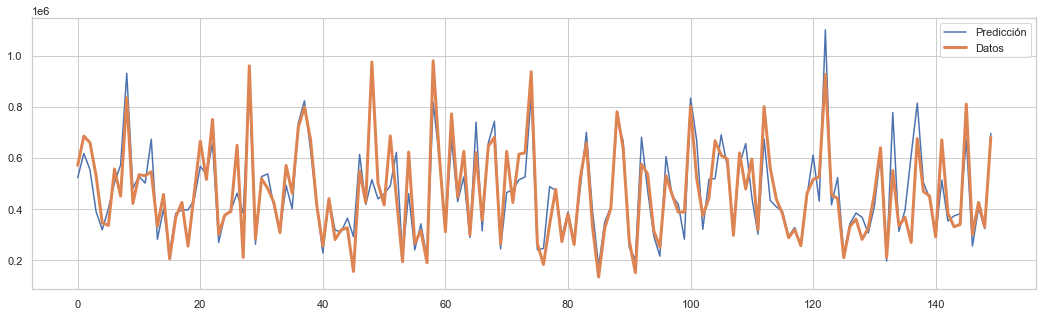

In [483]:
plt.figure(figsize=(18,5))

plt.plot(yhat, label='Predicción')
plt.plot(muestra_datos_reales, linewidth=3.0, label='Datos')
plt.legend(loc='best')

plt.show()

#### Ejemplo de implementación:

In [487]:
datos_nuevos={
    'floors':[1,1,2,2,1,2,2],
    'lat': [47.5112,47.5112,47.5112,47.4095,47.6127,47.6127,47.6127],
    'bedrooms':[2,3,4,2,1,3,2],
    'sqft_basement':[100,300,300,100,100,600,300],
    'bathrooms':[1,1,2,1,1,2,1],
    'sqft_living15':[250,300,400,250,200,500,300],
    'sqft_above':[800,1500,1600,700,600,2100,900],
    'grade':[7,8,11,6,7,9,7],
    'sqft_living':[200,300,350,250,200,500,300]
    
}

df_ejemplo=pd.DataFrame(datos_nuevos)
df_ejemplo

,floors,lat,bedrooms,sqft_basement,bathrooms,sqft_living15,sqft_above,grade,sqft_living
0,1,47.5112,2,100,1,250,800,7,200
1,1,47.5112,3,300,1,300,1500,8,300
2,2,47.5112,4,300,2,400,1600,11,350
3,2,47.4095,2,100,1,250,700,6,250
4,1,47.6127,1,100,1,200,600,7,200
5,2,47.6127,3,600,2,500,2100,9,500
6,2,47.6127,2,300,1,300,900,7,300


#### Predicción del precio:

In [488]:
precio=model_forest_reg2.predict(df_ejemplo)
precio

array([231666.09944444, 233815.08115079, 338014.99212121, 168138.60904762,
       331105.8204127 , 556394.57883838, 335759.485893  ])

In [495]:
df_ejemplo['precio']=([231666.09944444, 233815.08115079, 338014.99212121, 168138.60904762,
       331105.8204127 , 556394.57883838, 335759.485893  ])
df_ejemplo

,floors,lat,bedrooms,sqft_basement,bathrooms,sqft_living15,sqft_above,grade,sqft_living,precio
0,1,47.5112,2,100,1,250,800,7,200,231666.099444
1,1,47.5112,3,300,1,300,1500,8,300,233815.081151
2,2,47.5112,4,300,2,400,1600,11,350,338014.992121
3,2,47.4095,2,100,1,250,700,6,250,168138.609048
4,1,47.6127,1,100,1,200,600,7,200,331105.820413
5,2,47.6127,3,600,2,500,2100,9,500,556394.578838
6,2,47.6127,2,300,1,300,900,7,300,335759.485893
